모델 불러오기

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

데이터 읽기 및 데이터 정보

In [2]:
audi = pd.read_csv('data/audi.csv')

In [3]:
audi.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audi.shape

(10668, 9)

In [5]:
audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [6]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
audi['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [8]:
audi['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [9]:
audi['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

<AxesSubplot:>

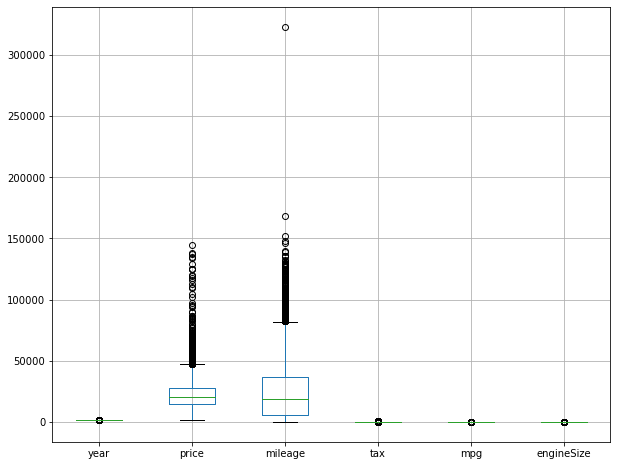

In [10]:
audi.boxplot(figsize = (10,8))

<AxesSubplot:>

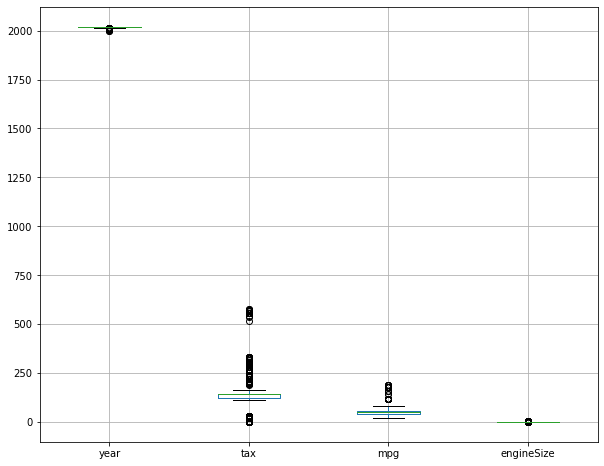

In [11]:
audi.drop(['price', 'mileage'], axis=1).boxplot(figsize = (10,8))

<AxesSubplot:>

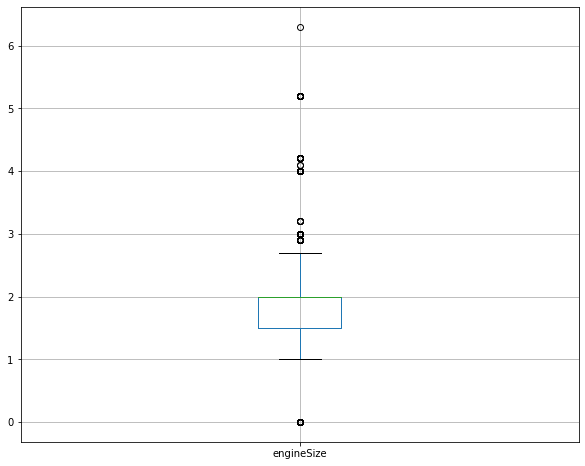

In [12]:
audi[['engineSize']].boxplot(figsize = (10,8))

데이터 전처리

In [13]:
audi_dum = pd.get_dummies(data=audi, columns=['model','transmission','fuelType'])

In [14]:
audi_dum.shape

(10668, 38)

In [15]:
audi_dum.head(5)

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [16]:
X = audi_dum.drop('price', axis = 1)
y = audi_dum['price']

In [17]:
X.shape, y.shape

((10668, 37), (10668,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [19]:
X_train.shape, y_train.shape

((8001, 37), (8001,))

In [20]:
X_test.shape, y_test.shape

((2667, 37), (2667,))

회귀모델

In [21]:
def rmse(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

metrics = {'MSE': mean_squared_error,
              'RMSE': rmse,
              'MAE': mean_absolute_error,
              'R2': r2_score}

def linear_eval(model):
    for i in metrics.keys():
        print(f'{i} : {metrics[i](y_test, model.predict(X_test))}')

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
linear_eval(lr)

MSE : 15364728.343240166
RMSE : 3919.78677267529
MAE : 2662.541430707184
R2 : 0.8871571785006387


In [23]:
for alpha in zip([0.001, 0.01, 0.1, 1, 10]):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alpha = ", alpha[0])
    linear_eval(ridge)

alpha =  0.001
MSE : 15364582.981171658
RMSE : 3919.7682305426756
MAE : 2662.5397784069473
R2 : 0.88715824607994
alpha =  0.01
MSE : 15363280.713956531
RMSE : 3919.602111688957
MAE : 2662.5250000732467
R2 : 0.8871678102911398
alpha =  0.1
MSE : 15350834.479796259
RMSE : 3918.014098978749
MAE : 2662.3857674982337
R2 : 0.8872592188828383
alpha =  1
MSE : 15272440.515980313
RMSE : 3907.9969953903897
MAE : 2662.870675350472
R2 : 0.8878349658708677
alpha =  10
MSE : 16022071.447571367
RMSE : 4002.7579801396146
MAE : 2717.4052688173433
R2 : 0.8823294686362781


In [24]:
for alpha in zip([1, 10, 100]):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    print("alpha = ", alpha[0])
    linear_eval(lasso)

alpha =  1
MSE : 15169198.038873106
RMSE : 3894.765466478451
MAE : 2653.2399001378058
R2 : 0.8885932072243822
alpha =  10
MSE : 15215240.195669623
RMSE : 3900.6717621032435
MAE : 2673.5223607483967
R2 : 0.8882550608696423
alpha =  100
MSE : 26566654.962276783
RMSE : 5154.2851068093605
MAE : 3166.27231774787
R2 : 0.8048871260999385


StandardScaler 적용

In [25]:
st_scaler = StandardScaler()
X_train_st_scaled = st_scaler.fit_transform(X_train)
X_test_st_scaled = st_scaler.transform(X_test)

In [26]:
def rmse(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

metrics = {'MSE': mean_squared_error,
              'RMSE': rmse,
              'MAE': mean_absolute_error,
              'R2': r2_score}

def linear_eval(model):
    for i in metrics.keys():
        print(f'{i} : {metrics[i](y_test, model.predict(X_test_st_scaled))}')

In [27]:
lr = LinearRegression()
lr.fit(X_train_st_scaled, y_train)
linear_eval(lr)

MSE : 4.004179063726851e+27
RMSE : 63278582978183.48
MAE : 2122295559209.8672
R2 : -2.940780033630731e+19


In [28]:
for alpha in zip([0.001, 0.01, 0.1, 1, 10]):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_st_scaled, y_train)
    print("alpha = ", alpha[0])
    linear_eval(ridge)

alpha =  0.001
MSE : 15248859.503592398
RMSE : 3904.9788096214297
MAE : 2652.730635977782
R2 : 0.8880081513585782
alpha =  0.01
MSE : 15248854.029956931
RMSE : 3904.978108767952
MAE : 2652.7293059077656
R2 : 0.8880081915584734
alpha =  0.1
MSE : 15248799.310643448
RMSE : 3904.971102408243
MAE : 2652.71600581159
R2 : 0.8880085934322708
alpha =  1
MSE : 15248253.75626472
RMSE : 3904.9012479529774
MAE : 2652.5830578712685
R2 : 0.8880126001347651
alpha =  10
MSE : 15242960.439692989
RMSE : 3904.223410576422
MAE : 2651.2652235539276
R2 : 0.8880514757180946


In [29]:
for alpha in zip([10, 100]):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_st_scaled, y_train)
    print("alpha = ", alpha[0])
    linear_eval(lasso)

alpha =  10
MSE : 15208832.397459924
RMSE : 3899.850304493741
MAE : 2645.1046696516883
R2 : 0.88830212151487
alpha =  100
MSE : 15260674.213519422
RMSE : 3906.491291878099
MAE : 2619.128090023589
R2 : 0.8879213808558021


MinMaxScaler 적용

In [30]:
mm_scaler = MinMaxScaler()
X_train_mm_scaled = mm_scaler.fit_transform(X_train)
X_test_mm_scaled = mm_scaler.transform(X_test)

In [31]:
def rmse(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

metrics = {'MSE': mean_squared_error,
              'RMSE': rmse,
              'MAE': mean_absolute_error,
              'R2': r2_score}

def linear_eval(model):
    for i in metrics.keys():
        print(f'{i} : {metrics[i](y_test, model.predict(X_test_mm_scaled))}')

In [32]:
lr = LinearRegression()
lr.fit(X_train_mm_scaled, y_train)
linear_eval(lr)

MSE : 15364728.343243336
RMSE : 3919.7867726756945
MAE : 2662.5414307070964
R2 : 0.8871571785006155


In [33]:
for alpha in zip([0.001, 0.01, 0.1, 1, 10]):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_mm_scaled, y_train)
    print("alpha = ", alpha[0])
    linear_eval(ridge)

alpha =  0.001
MSE : 15364576.858486984
RMSE : 3919.767449541743
MAE : 2662.5224628469423
R2 : 0.8871582910466325
alpha =  0.01
MSE : 15363222.029217778
RMSE : 3919.594625623647
MAE : 2662.3519842619985
R2 : 0.8871682412881188
alpha =  0.1
MSE : 15350491.87313327
RMSE : 3917.9703767554533
MAE : 2660.6870938015127
R2 : 0.8872617350810849
alpha =  1
MSE : 15286237.565979782
RMSE : 3909.7618298279735
MAE : 2648.344124379266
R2 : 0.8877336365134246
alpha =  10
MSE : 16570488.045745524
RMSE : 4070.686434220342
MAE : 2681.8305010742556
R2 : 0.8783017452094413


In [34]:
for alpha in zip([1, 10, 100]):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_mm_scaled, y_train)
    print("alpha = ", alpha[0])
    linear_eval(lasso)

alpha =  1
MSE : 15167237.407814762
RMSE : 3894.5137575587996
MAE : 2649.1148472105842
R2 : 0.8886076066420354
alpha =  10
MSE : 15297091.047932288
RMSE : 3911.1495813804268
MAE : 2644.619992868891
R2 : 0.8876539255351859
alpha =  100
MSE : 26333450.66493264
RMSE : 5131.612871693717
MAE : 3211.986127427635
R2 : 0.806599843065069
